<h1 align="center" style="margin-bottom: 20px;">Machine Learning 2024-25</h1>
<h3 align="center" style="margin-top: 20px; margin-bottom: 20px;">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>
<h5 align="center" style="margin-top: 20px; margin-bottom: 0px;">Notebook 3: Cross-Validation and Deployment</h5>

### Group 38 - Members:
- Ana Marta Azinheira  - 20240496@novaims.unl.pt
- Braulio Damba - 20240007@novaims.unl.pt
- Catarina Ribeirinha - 20240507@novaims.unl.pt
- Marco Galão  - r20201545@novaims.unl.pt
- Rodrigo Sardinha - 20211627@novaims.unl.pt

# Table of Contents

* [1. Imports](#imports)
  * [1.1. Import Libraries](#import_libraries)
  * [1.2. Imports Datasets](#import_datasets)

* [2. Analysis Before Cross-Validation](#analysis_before_cv)
  * [2.1. Outliers (Only Analysis)](#outliers)
    * [2.1.1. Metric and Non-metric Features](#defining_features)
    * [2.1.2. Histograms and Boxplots](#visualizations)
    * [2.1.3. Filtering](#filtering)
      * [2.1.3.1. IQR Method](#iqr_method)
      * [2.1.3.2. Manual Method](#manual_method)
      * [2.1.3.3. Winsorizing](#winsorizing)
  * [2.2. Missing Values Imputation (Only Analysis)](#mv_imputation)

* [3. Cross-Validation](#cross_validation)
  * [3.1 Run Cross-Validation for Models with Default Parameters](#cv_default_parameters)
  * [3.2 Run Cross-Validation for Best Default Models with Optimized Parameters](#cv_optimized_parameters)

* [4. Deployment](#deployment)

# 1. Imports <a id="imports"></a>

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>


In [510]:
# Cross Validation Utils
from utils import *

# Visualization Settings
%config InlineBackend.figure_format = 'retina'
sns.set()

# Omit Warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2. Import the Datasets <a class="anchor" id="import_datasets"></a>

In [488]:
# Define date columns to parse
date_cols = ["Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]

In [489]:
df = pd.read_csv('df_nb2.csv', sep=',', parse_dates=date_cols, index_col='Claim Identifier')
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Male
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,0.0,2020-01-01,0,0.00,2019-12-31,NaT,new hampshire insurance company,1A. PRIVATE,...,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662.0,1.0
5393091,2019-08-30,46,0.0,2020-01-01,1,1745.93,2020-01-01,2020-01-01,zurich american insurance company,1A. PRIVATE,...,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569.0,0.0
5393889,2019-12-06,40,0.0,2020-01-01,0,1434.80,2020-01-01,NaT,indemnity insurance company of,1A. PRIVATE,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589.0,1.0
5393887,2019-12-30,61,0.0,2020-01-01,0,NaN,2019-12-31,NaT,state insurance fund,2A. SIF,...,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603.0,1.0
5393863,2019-12-26,67,0.0,2020-01-01,0,0.00,2019-12-31,NaT,indemnity insurance of n america,1A. PRIVATE,...,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772.0,1.0


In [490]:
df_test = pd.read_csv('df_test_nb2.csv', sep=',', parse_dates=date_cols, index_col='Claim Identifier')
df_test.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Male
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,0.0,2023-01-02,0,NaN,2023-01-02,NaT,indemnity insurance company of,1A. PRIVATE,...,TRANSPORTATION AND WAREHOUSING,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466.0,1.0
6166141,2022-11-20,19,0.0,2023-01-02,0,NaN,2023-01-02,NaT,a i u insurance company,1A. PRIVATE,...,RETAIL TRADE,IV,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691.0,0.0
6165907,2022-12-26,59,0.0,2023-01-02,0,0.0,2022-12-31,NaT,amguard insurance company,1A. PRIVATE,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604.0,0.0
6166047,2022-12-28,55,0.0,2023-01-02,0,0.0,2023-01-02,NaT,indemnity insurance of n america,1A. PRIVATE,...,TRANSPORTATION AND WAREHOUSING,IV,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411.0,0.0
6166102,2022-12-20,25,0.0,2023-01-02,0,0.0,2022-12-31,NaT,new hampshire insurance company,1A. PRIVATE,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212.0,1.0


In [491]:
df_sample_submission = pd.read_csv('../data/sample_submission.csv', sep=',')
df_sample_submission.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


# 2. Analysis Before Cross-Validation <a id="analysis_before_cv"></a>

## 2.1. Outliers (Only Analysis) <a id="outliers"></a>

**Note:**

Before performing cross-validation, we will evaluate different outlier removal approaches. Although this is not entirely correct — as it involves assessing both the training and validation data together during outlier evaluation — it is a more practical method for determining the best approach and thresholds for outlier removal.

By evaluating outliers outside the cross-validation function, we can efficiently compare multiple strategies and their impact on the data. Once the optimal method and values are identified, we will apply them consistently throughout the modeling process.

### 2.1.1 Metric and Non-metric Features <a id="defining_features"></a>

In [492]:
# Define metric (numerical) features for both train and validation datasets
metric_features = df.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df.select_dtypes(exclude=['number']).columns.tolist()

In [493]:
metric_features

['Age at Injury',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'Average Weekly Wage',
 'COVID-19 Indicator',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code',
 'Male']

In [494]:
non_metric_features

['Accident Date',
 'Assembly Date',
 'C-2 Date',
 'C-3 Date',
 'Carrier Name',
 'Carrier Type',
 'Claim Injury Type',
 'County of Injury',
 'District Name',
 'First Hearing Date',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description']

### 2.1.2 Histograms and Boxplots <a id="visualizations"></a>

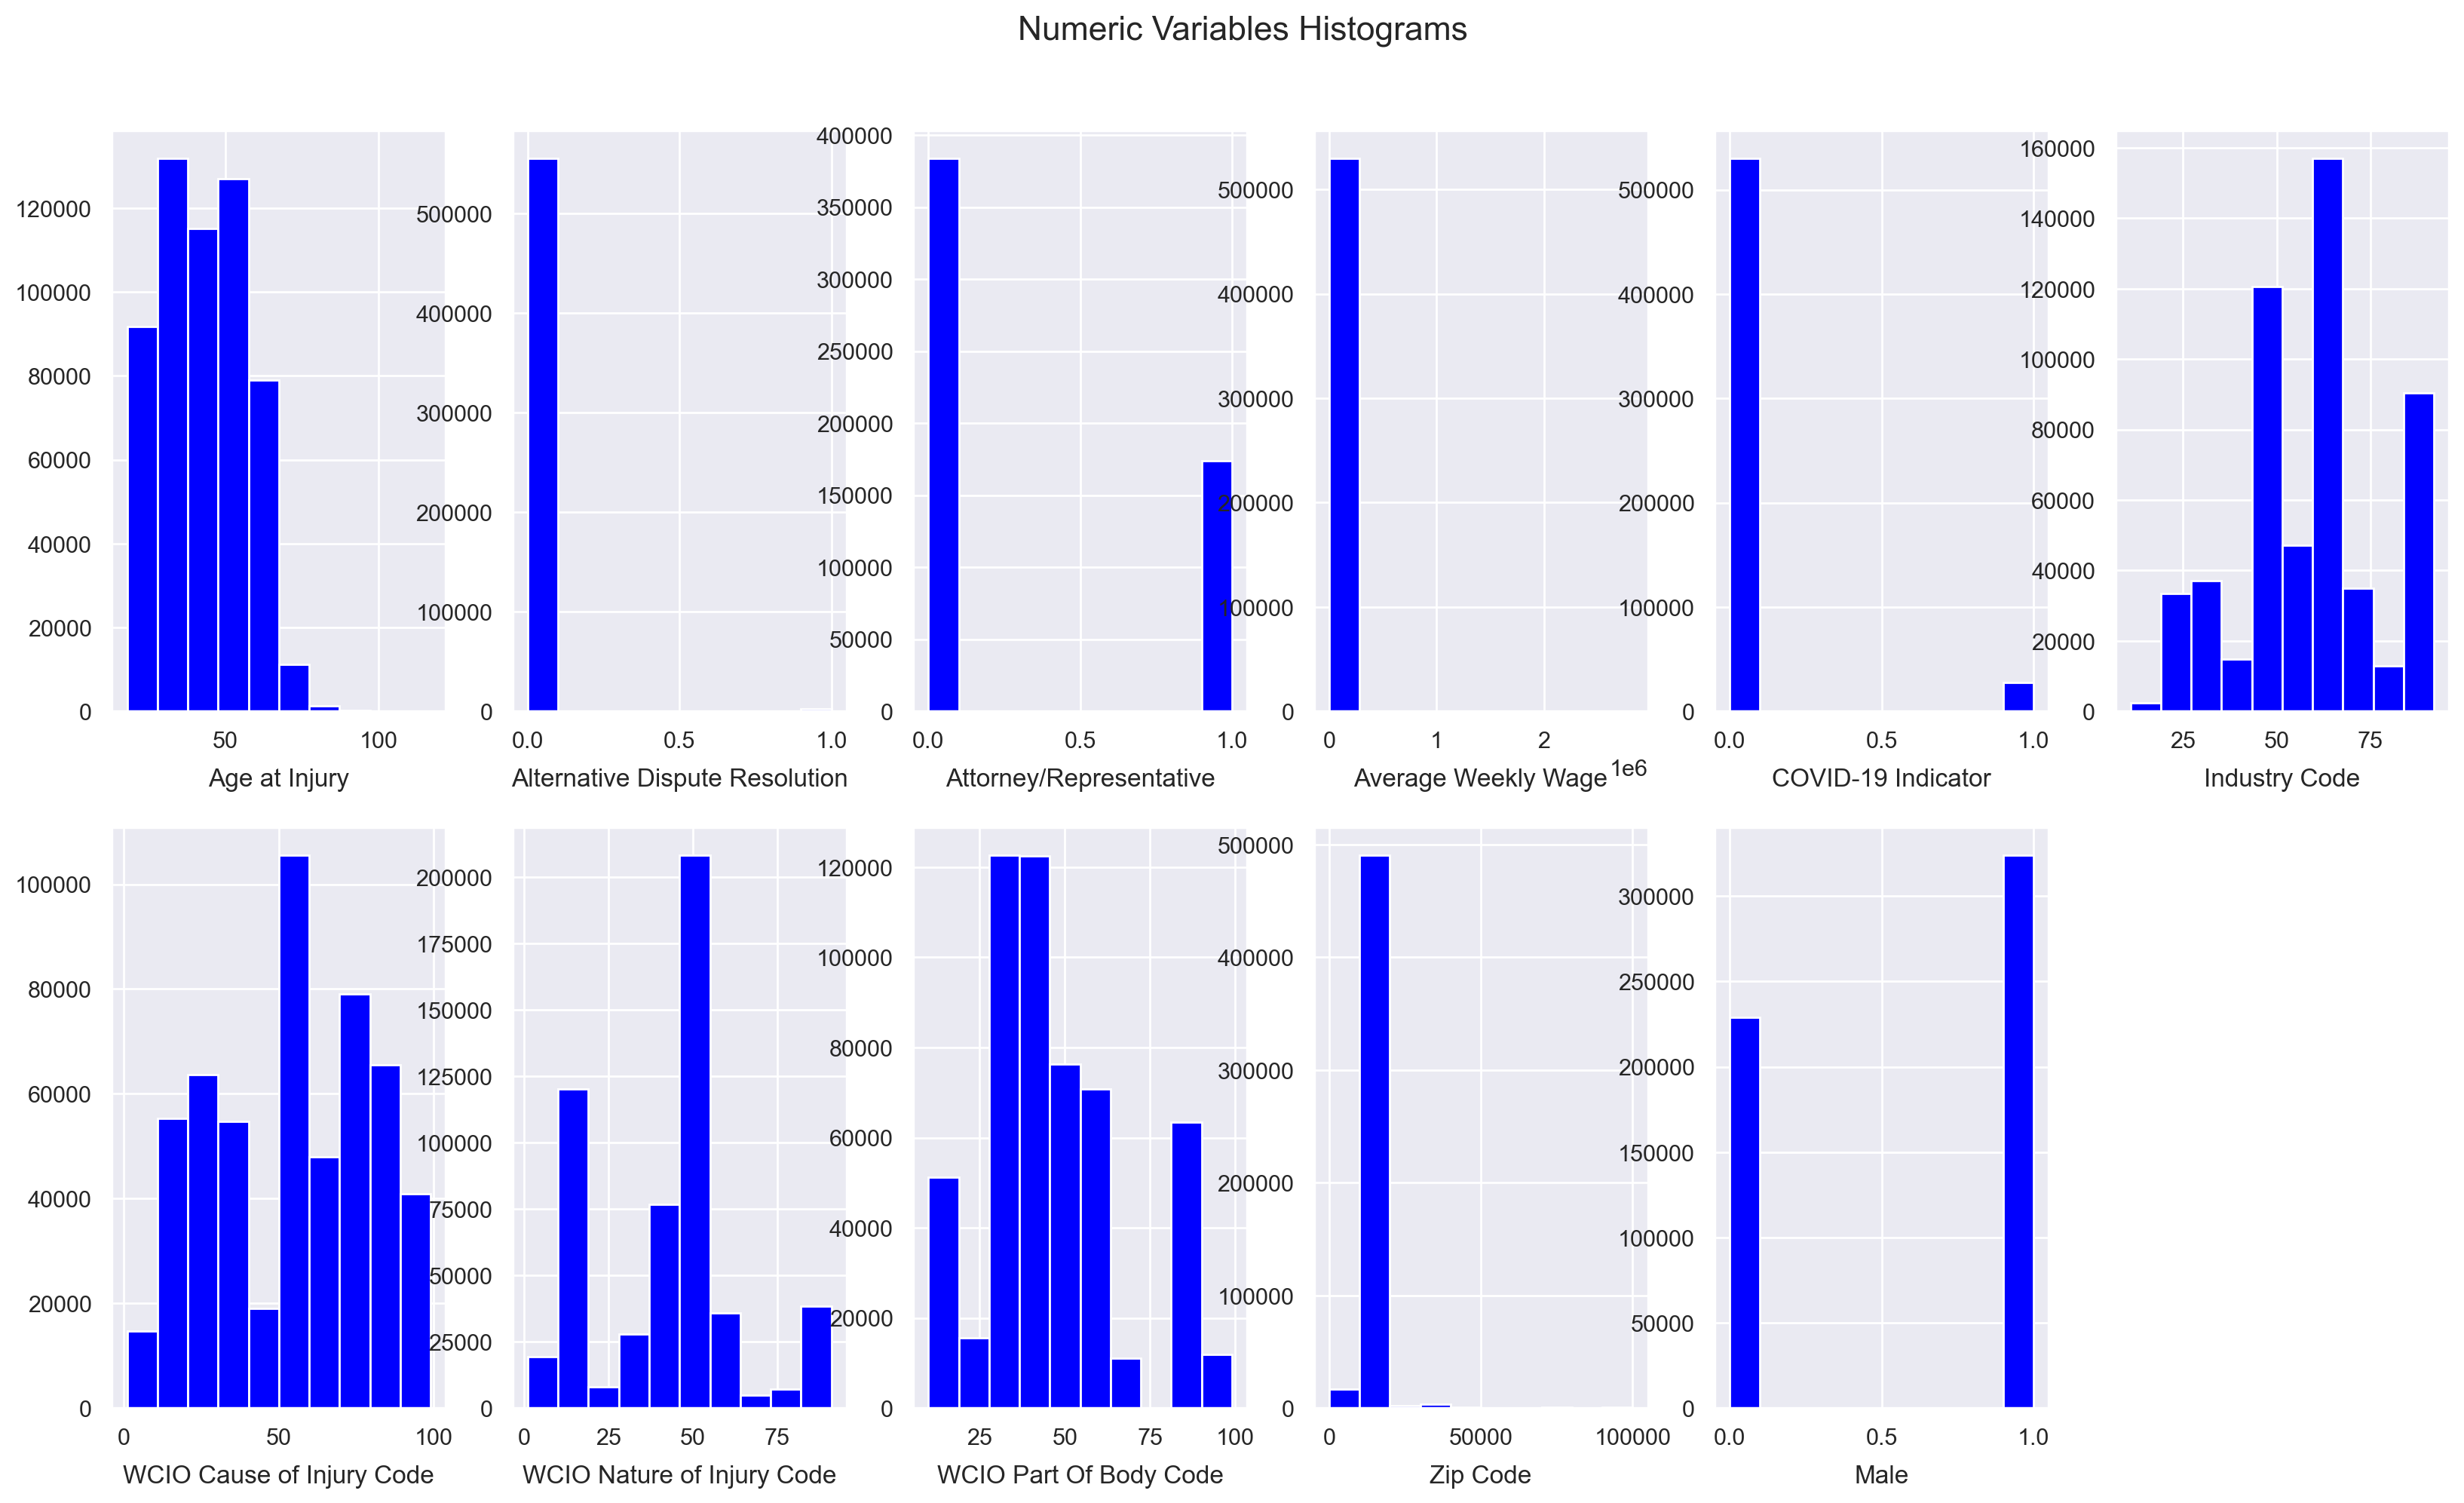

In [495]:
# Plot all numeric features (histograms)
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot histograms for df
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], bins=10, color='blue')
    ax.set_title(feat, y=-0.15)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.suptitle('Numeric Variables Histograms', fontsize=16, y=0.95)
plt.show()

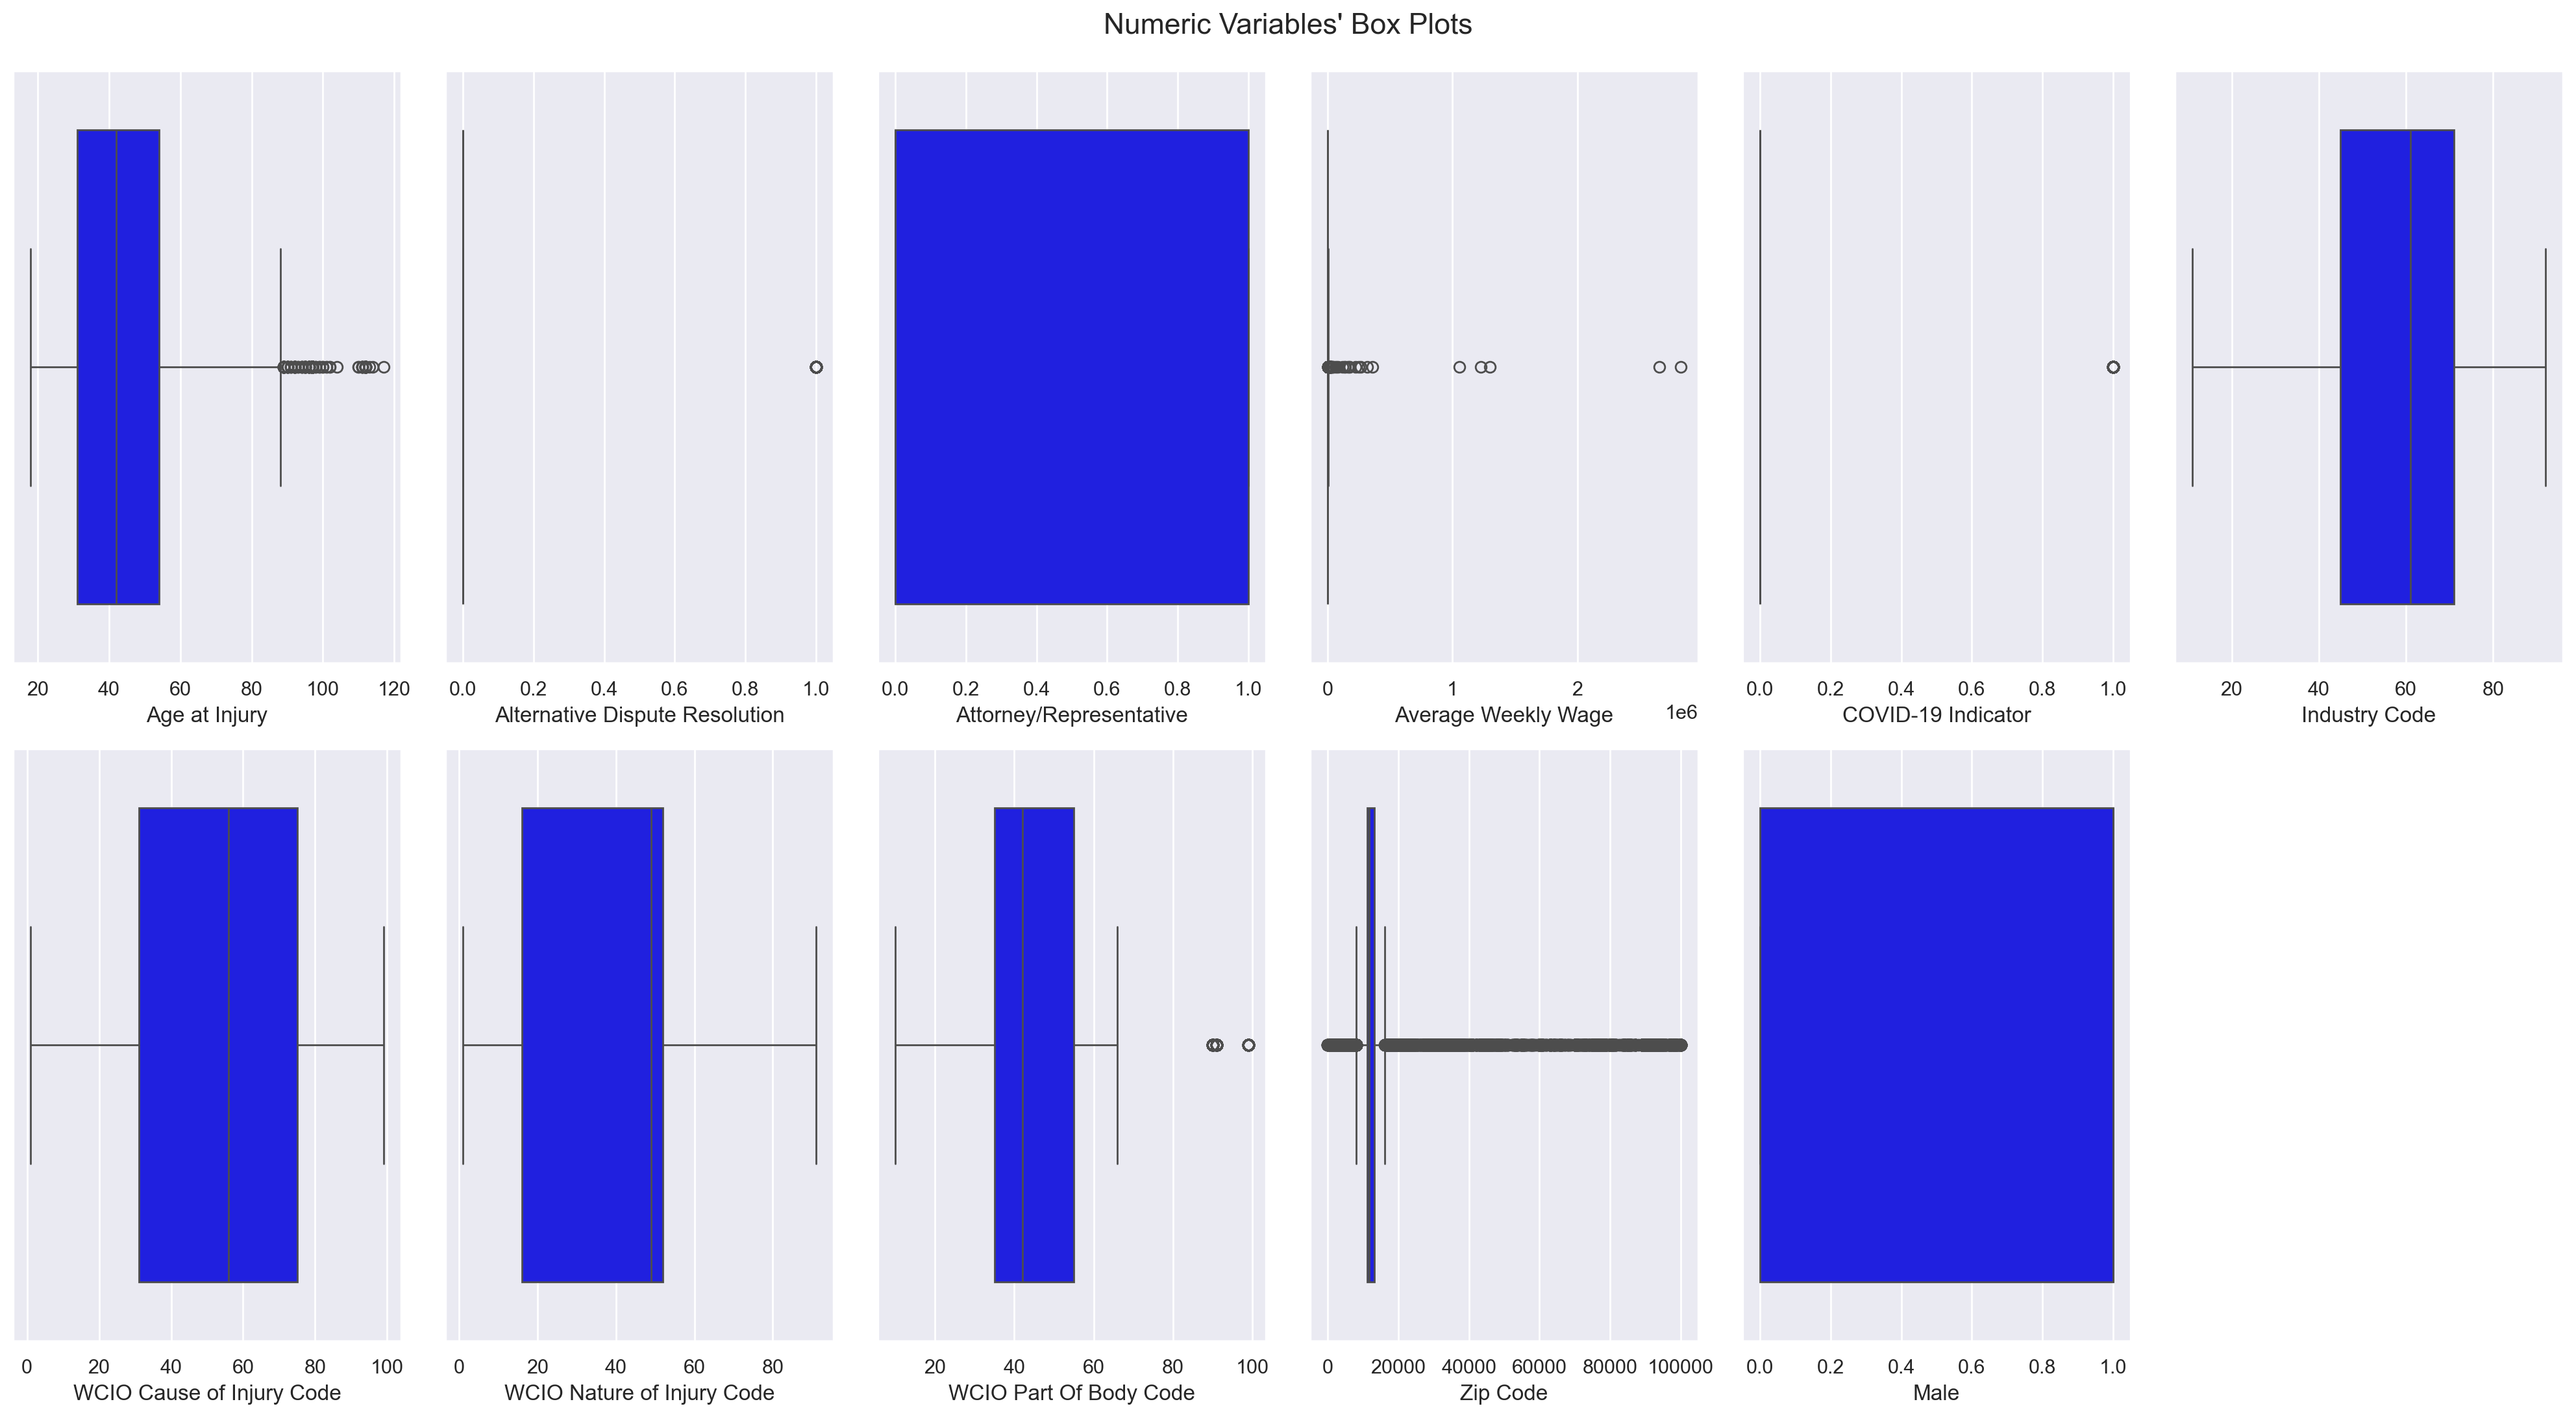

In [496]:
# Create box plots for each numerical feature
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=df, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### 2.1.3 Filtering <a id="filtering"></a>

#### 2.1.3.1 IQR Method <a id="iqr_method"></a>

Our initial idea was to use the **Z-score** method to identify and potentially remove outliers. However, this approach has its limitations, as it is only applicable to data columns that are normally distributed. Therefore, we decided to use the **Interquartile Range (IQR)** method to handle skewed distributions more effectively.

In [497]:
def drop_outliers_iqr(df, metric_features):
    # Calculate Q1, Q3, and IQR for each metric feature
    Q1 = df[metric_features].quantile(0.25)
    Q3 = df[metric_features].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR

    # Create a filter for rows within bounds
    filter_mask = (df[metric_features] >= lower_lim) & (df[metric_features] <= upper_lim)
    
    # Keep rows where all conditions are True across metric features
    filter_mask = filter_mask.all(axis=1)

    # Filter the original dataframe
    df_filtered = df[filter_mask]
    
    return df_filtered

In [498]:
# Apply IQR filter
outliers_filter1 = drop_outliers_iqr(df, metric_features)

# Calculate the number of rows before and after removing outliers
original_count = len(df)
filtered_count = len(outliers_filter1)

# Calculate the percentage of rows removed
rows_removed = original_count - filtered_count
percentage_removed = (rows_removed / original_count) * 100

# Output the result
print(f'Outliers removed due to IQR method: {rows_removed} ({percentage_removed:.2f}%)')

Outliers removed due to IQR method: 197315 (35.39%)


**Conclusion:** As we can notice, this approach is problematic since it removes too much observations.

#### 2.1.3.2 Manual Method <a id="manual_method"></a>

In [499]:
df[metric_features].describe()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Male
count,557523.00000,557521.000000,557523.000000,5.298310e+05,557523.000000,550691.000000,546491.000000,546475.000000,545325.000000,514942.000000,553068.000000
mean,42.59439,0.003724,0.311442,4.994346e+02,0.049006,58.717077,54.158385,40.894268,47.266630,12465.894788,0.585915
std,13.65551,0.060908,0.463083,6.180581e+03,0.215881,19.626000,25.740773,22.185770,21.327416,5229.213993,0.492564
min,18.00000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,31.00000,0.000000,0.000000,0.000000e+00,0.000000,45.000000,31.000000,16.000000,35.000000,11106.000000,0.000000
50%,42.00000,0.000000,0.000000,0.000000e+00,0.000000,61.000000,56.000000,49.000000,42.000000,11727.000000,1.000000
75%,54.00000,0.000000,1.000000,8.561850e+02,0.000000,71.000000,75.000000,52.000000,55.000000,13143.000000,1.000000
max,117.00000,1.000000,1.000000,2.828079e+06,1.000000,92.000000,99.000000,91.000000,99.000000,99999.000000,1.000000


In [500]:
print(sorted(df["Age at Injury"].unique(), reverse=True))

[117, 114, 113, 112, 111, 110, 104, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18]


In [501]:
# Define the threshold for age and average weekly wage
age_threshold = 100
avg_wage_threshold = 8_000 # a value 0 could be possible:
                           # the individual is a volunteer (as mention in the description)
                           # the individual might not have worked during the period,
                           # or their wage is zero for some reason (e.g., leave of absence, unemployment)

# Define conditions for each feature to identify outliers, while preserving NaN values
filter_age = df["Age at Injury"].isna() | (df["Age at Injury"] <= age_threshold)
filter_wage = df["Average Weekly Wage"].isna() | (df["Average Weekly Wage"] <= avg_wage_threshold)

# Apply the combined filter
outliers_filter2 = df[filter_age & filter_wage]

# Rows removed and percentage
rows_removed = len(df) - len(outliers_filter2)
perc_removed = (rows_removed / len(df)) * 100

# Print out the results
print(f"Outliers removed due to manual method (excluding NaNs): {rows_removed} ({round(perc_removed, 2)}%)")

Outliers removed due to manual method (excluding NaNs): 132 (0.02%)


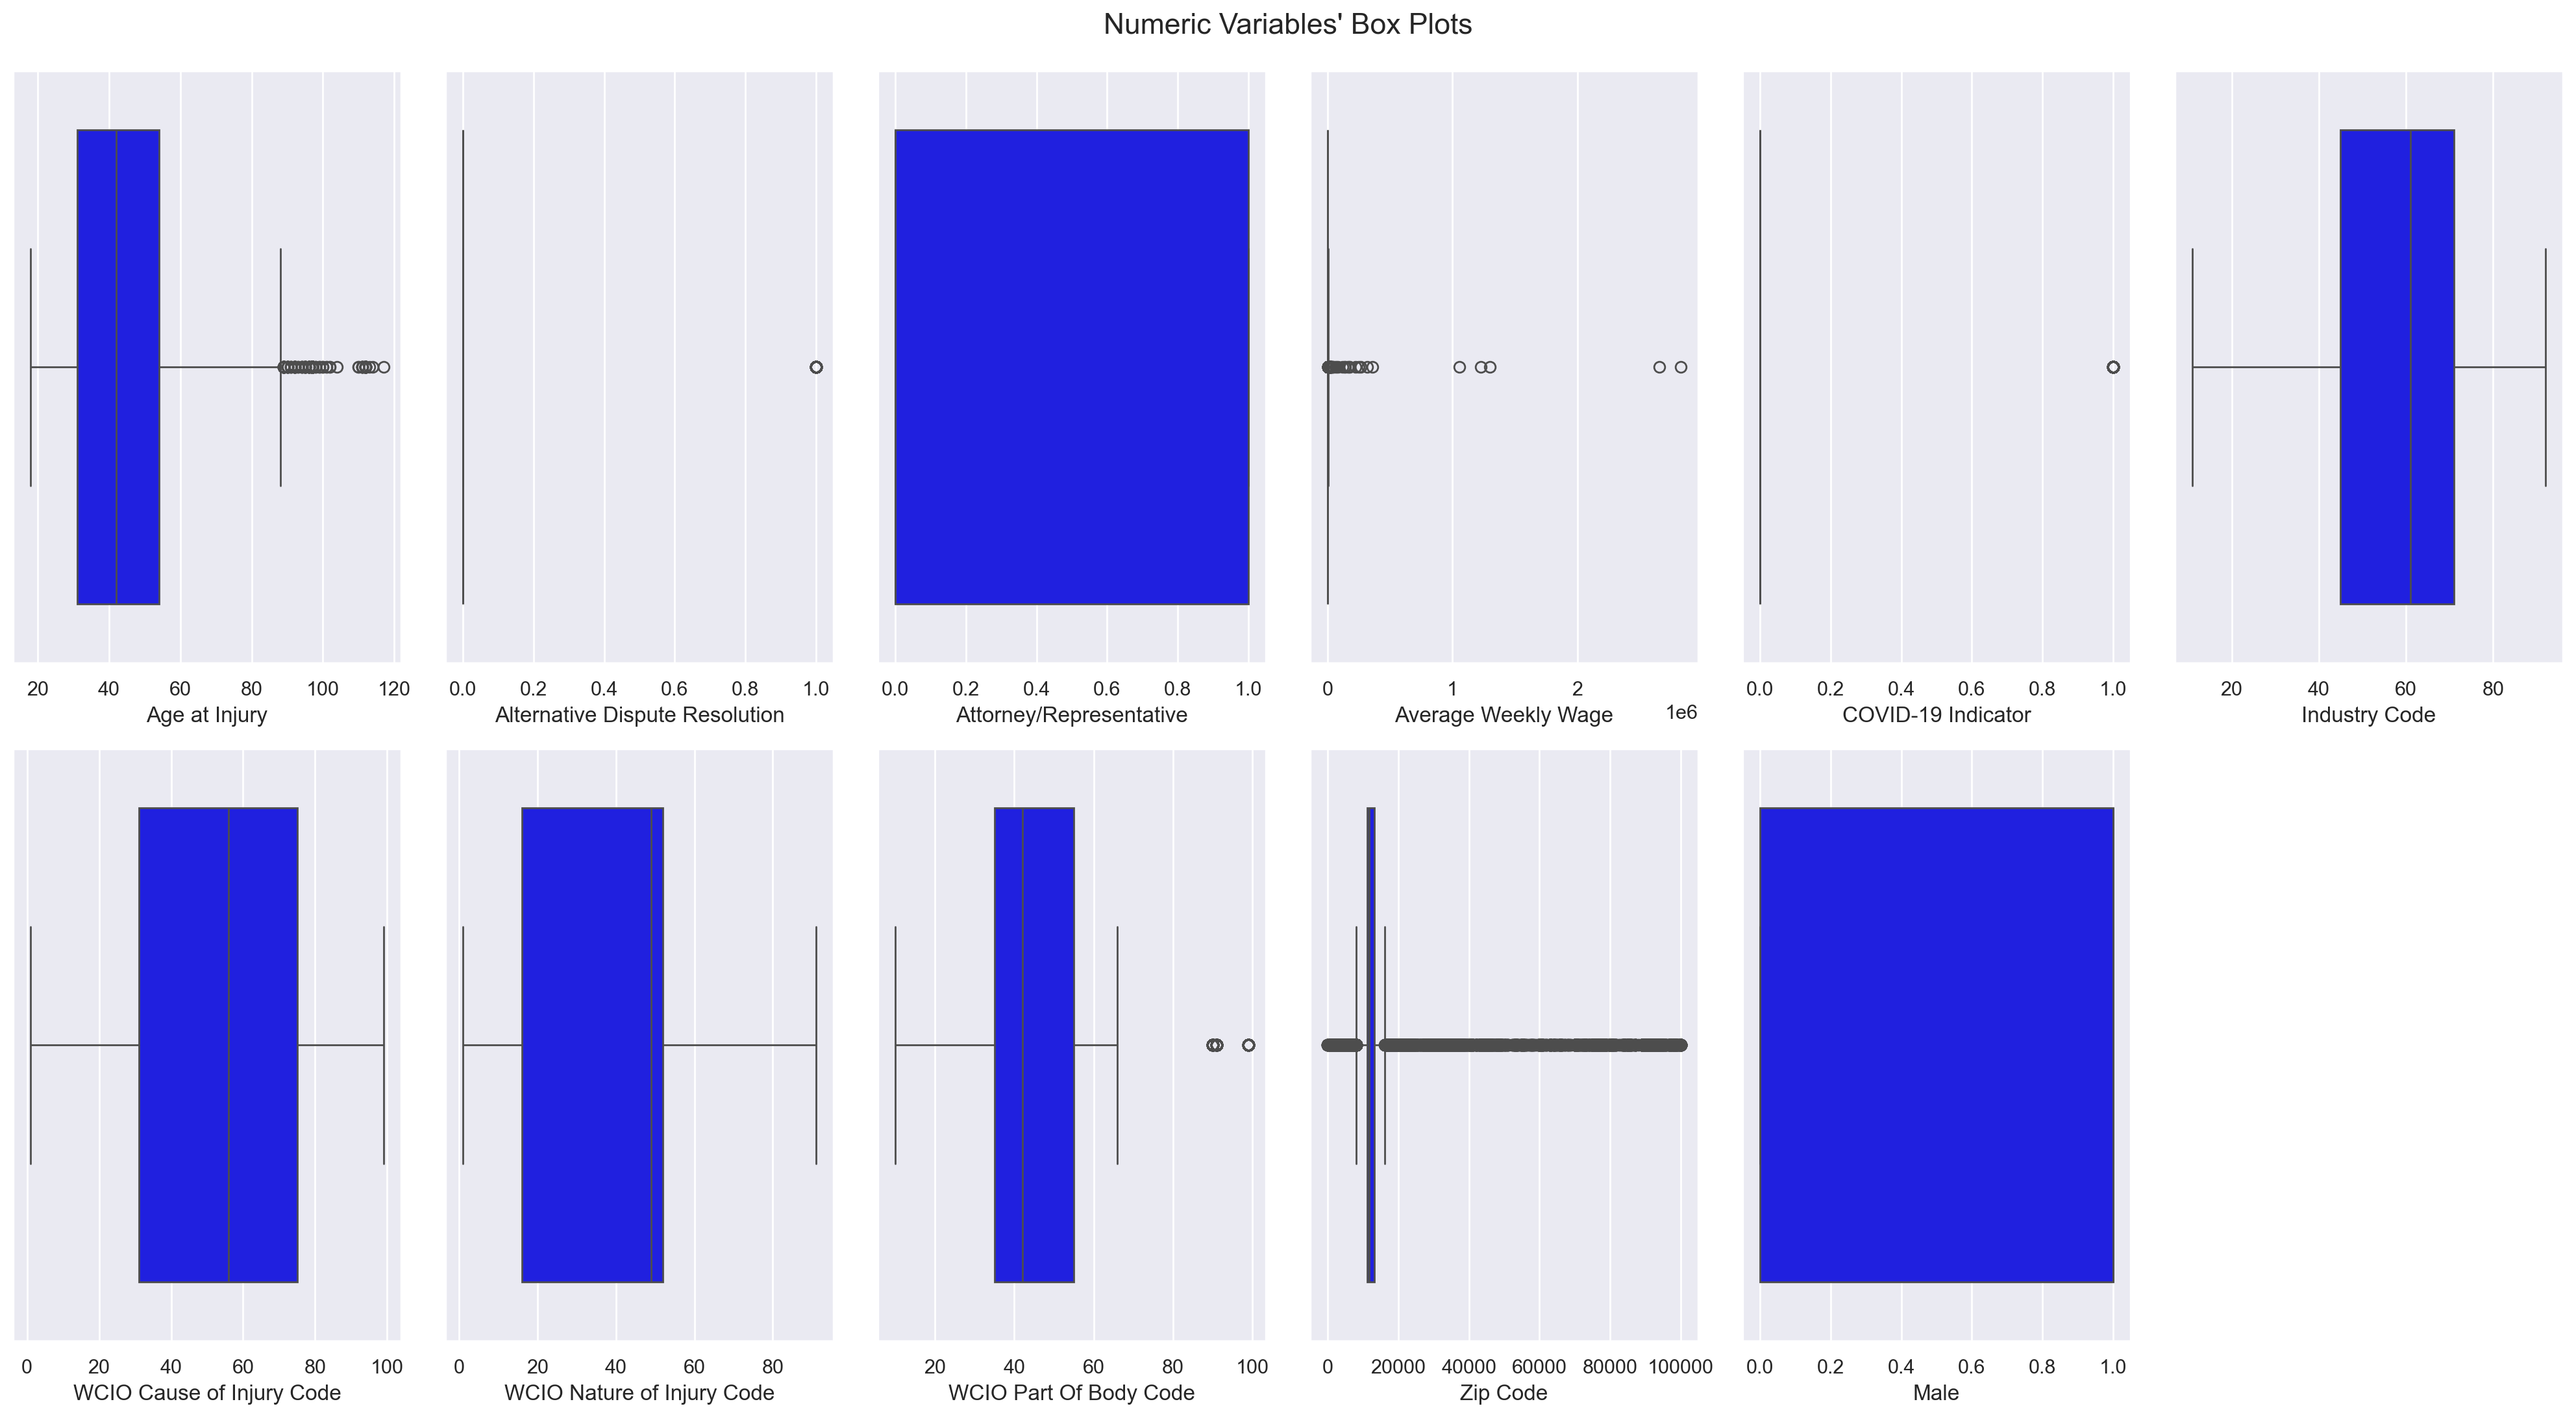

In [502]:
# Create box plots for each numerical feature
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=df, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### 2.1.3.3 Winsorizing <a id="winsorizing"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [503]:
# Define Winsorization function based on IQR
def apply_winsorization(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count affected rows before applying Winsorization
    affected_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Apply Winsorization
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df, affected_before

In [504]:
# Apply Winsorization to relevant columns in outliers_filter3
outliers_filter3 = df.copy()
outliers_filter3, affected_age = apply_winsorization(outliers_filter3, "Age at Injury")
outliers_filter3, affected_wage = apply_winsorization(outliers_filter3, "Average Weekly Wage")

# Calculate total affected rows and percentage for the training set
total_affected = affected_age + affected_wage
total_percentage = (total_affected / outliers_filter3.shape[0]) * 100

# Calculate individual percentages for each variable in the training set
perc_age = (affected_age / outliers_filter3.shape[0]) * 100
perc_wage = (affected_wage / outliers_filter3.shape[0]) * 100

# Print results for the training data
print(f"Age at Injury: {affected_age} outliers affected ({perc_age:.2f}%)")
print(f"Average Weekly Wage: {affected_wage} outliers affected ({perc_wage:.2f}%)")
print(f"Outliers affected due to winsorization method: {total_affected} ({total_percentage:.2f}%)")

Age at Injury: 179 outliers affected (0.03%)
Average Weekly Wage: 20581 outliers affected (3.69%)
Outliers affected due to winsorization method: 20760 (3.72%)


**Conclusion:** This winsorization method seems a good approach, impacting only 3.72% of rows

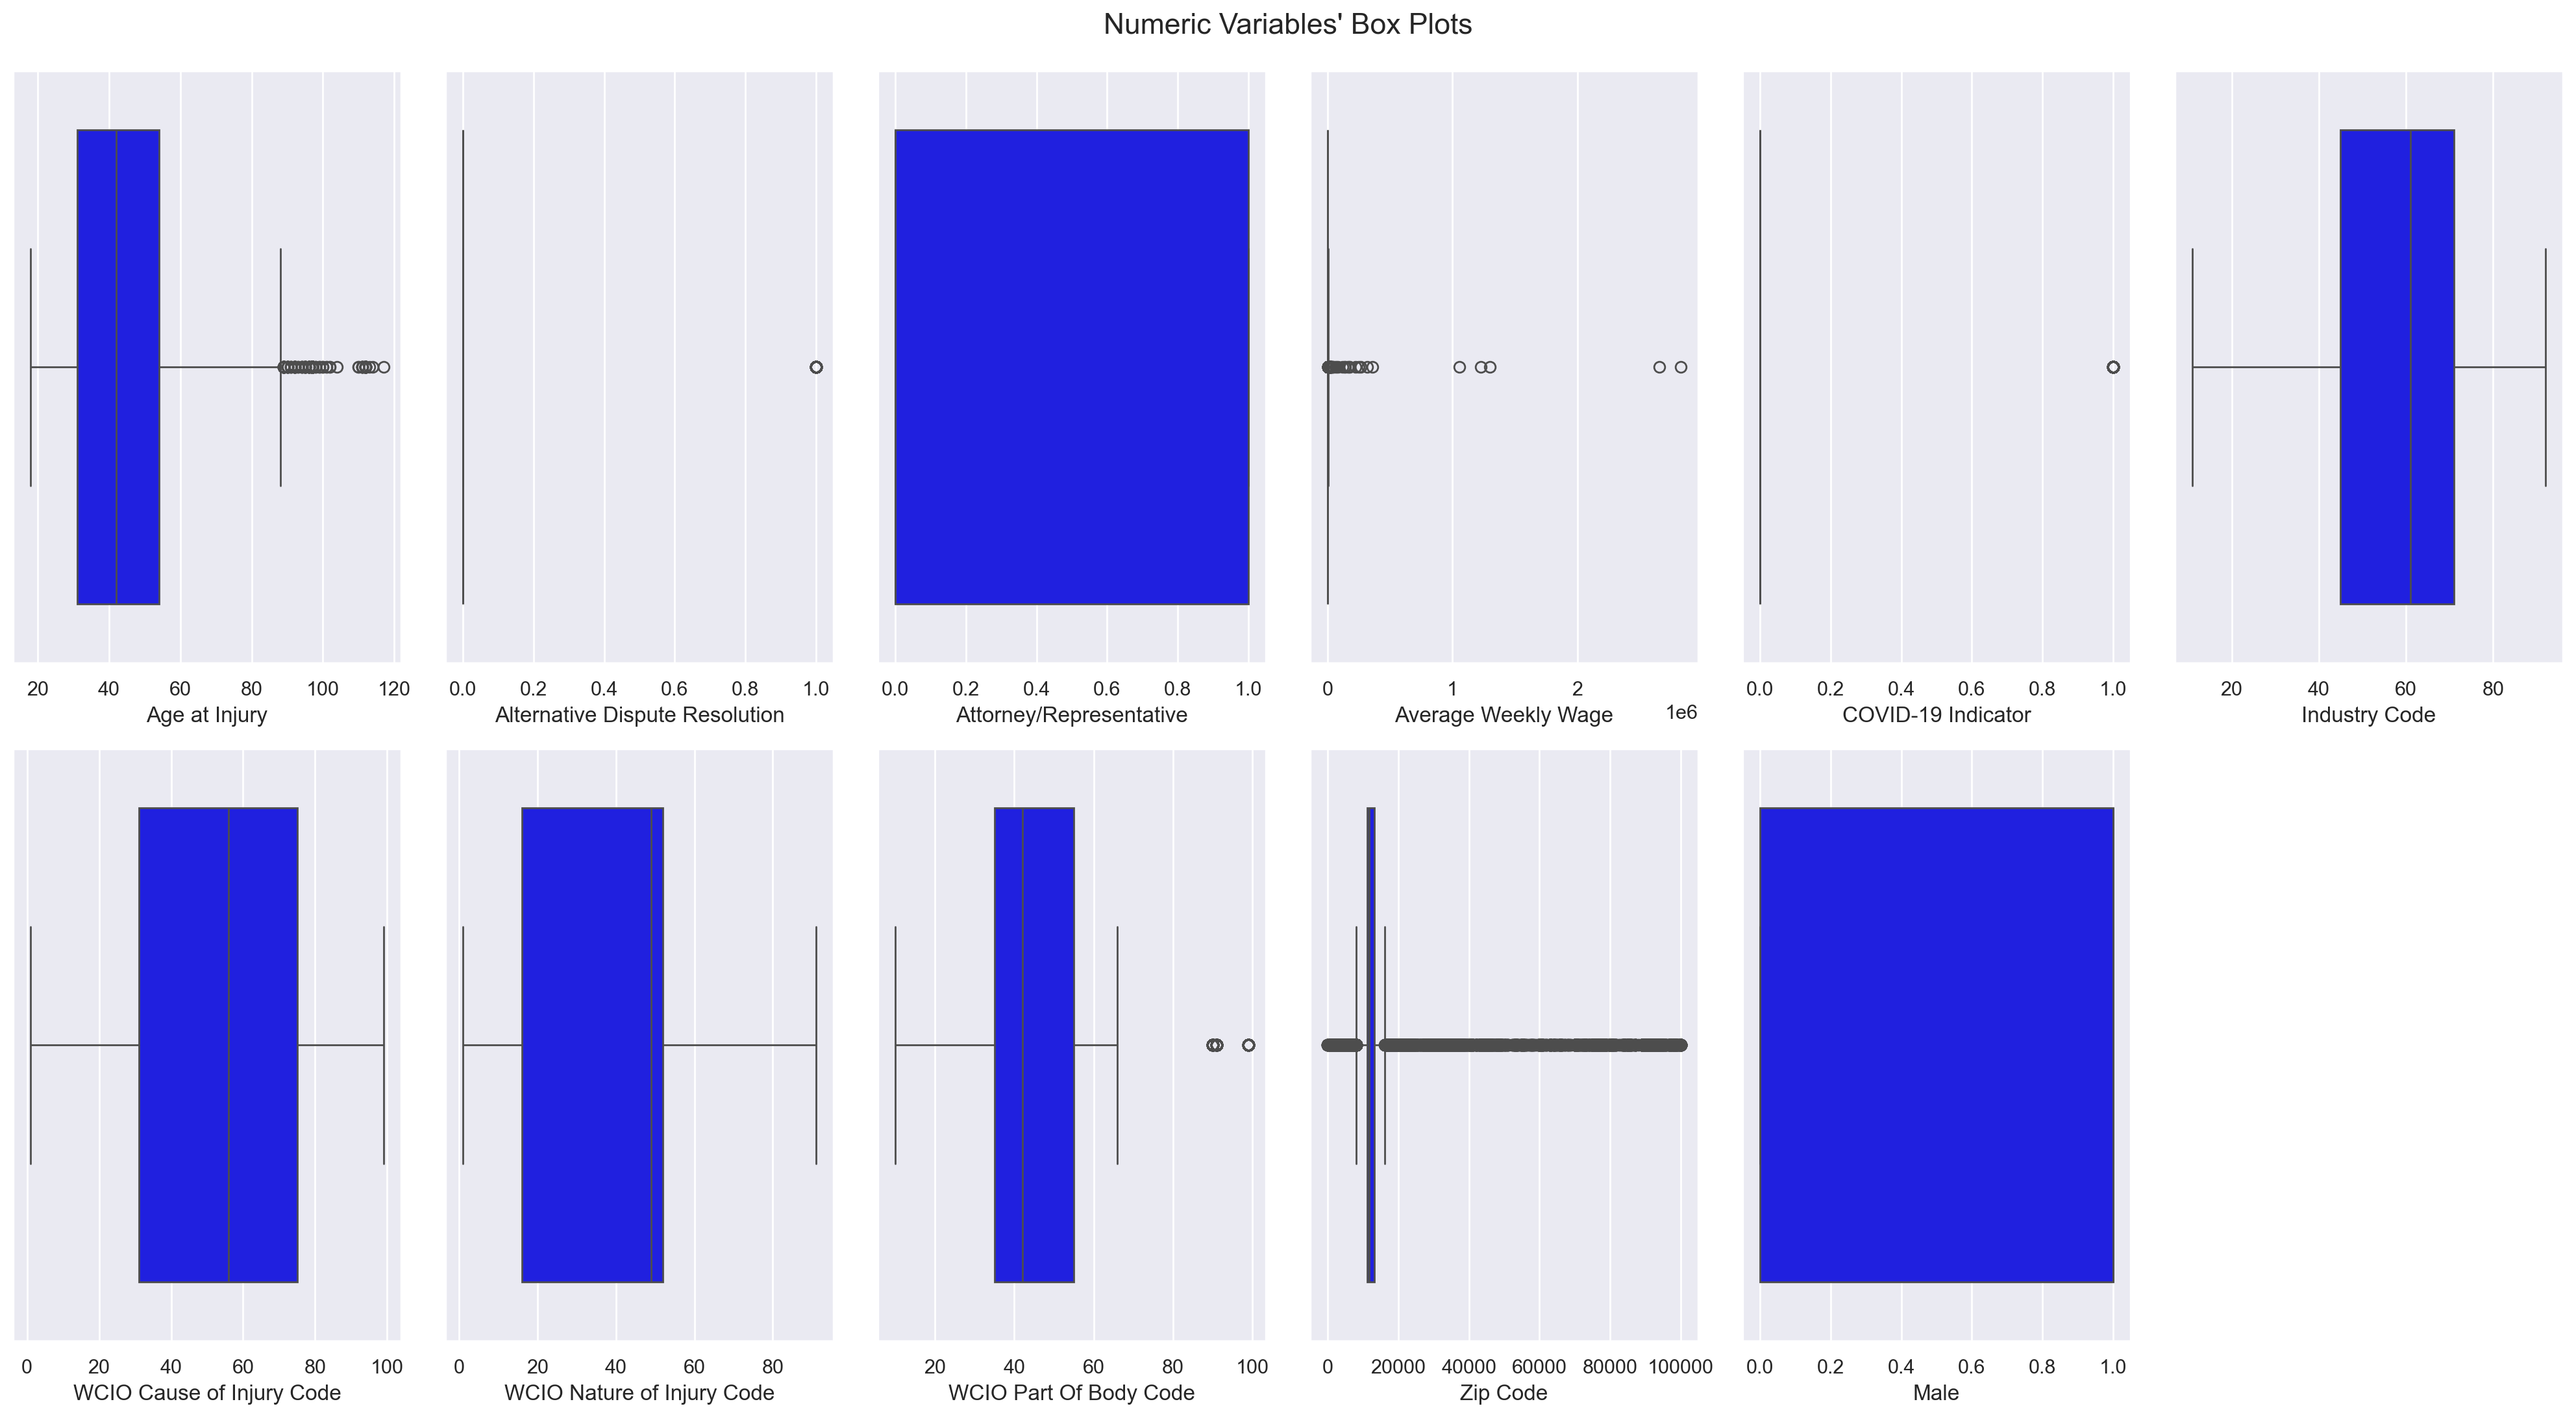

In [505]:
# Create box plots for each numerical feature
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=df, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

## 2.2. Missing Values Imputation (Only Analysis) <a id="mv_imputation"></a>

In [506]:
# Calculate the percentage of missing values in each column
perc_missing_values = (df.isna().sum() / len(df) * 100)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

First Hearing Date                   73.806103
C-3 Date                             67.677387
Zip Code                              7.637532
Medical Fee Region                    5.615553
Average Weekly Wage                   4.966970
WCIO Part Of Body Code                2.187892
WCIO Part Of Body Description         2.187892
WCIO Nature of Injury Code            1.981622
WCIO Nature of Injury Description     1.981622
WCIO Cause of Injury Code             1.978752
WCIO Cause of Injury Description      1.978752
C-2 Date                              1.851583
Industry Code                         1.225420
Industry Code Description             1.225420
Male                                  0.799070
Carrier Type                          0.229766
County of Injury                      0.199454
Alternative Dispute Resolution        0.000359
dtype: float64

**Note:** For a quicker execution, we will use central tendency measures - median (for numeric features) and mode (for categorical features) to impute missing values.

# 3. Cross-Validation <a id="cross_validation"></a>

## 3.1 Run Cross-Validation for Models with Default Parameters <a id="cv_default_parameters"></a>

In [509]:
# Define default models
models_default_parameters = {
    "LogisticRegression": {},
    "RandomForest": {},
    "XGBoost": {},
    "SVM": {},
    "Bagging": {},
    "DecisionTree": {},
    "NeuralNetworks": {},
    "Adaboost": {},
    "GBM": {}
}

# Using default models to choose which ones to optimize
default_models = define_models(models_default_parameters)
show_results(default_models, df, feats_dict)

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Spearman Correlation - Number of Excluded Features: 5 / 20
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Log Age at Injury', 'Medical Fee Region', 'County of Injury', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Log Age at Injury', 'Age at Injury'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category'), ('Average Weekly Wage by Medical Fee Region', 'County of Injury'), ('Average Weekly Wage by Medical Fee Region', 'Medical Fee Region')]

RFE - Number of Selected Features: 18 / 24
RFE - Selected Features: ['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name',

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
NeuralNetworks,0.380 +/- 0.04,0.611 +/- 0.06,-0.231 +/- 0.08,0.562 +/- 0.42,200.0 +/- 0.0,None
Bagging,0.372 +/- 0.02,0.970 +/- 0.01,-0.599 +/- 0.03,0.031 +/- 0.01,0.0 +/- 0.0,None
XGBoost,0.369 +/- 0.02,0.998 +/- 0.00,-0.629 +/- 0.03,0.294 +/- 0.12,0.0 +/- 0.0,None
GBM,0.362 +/- 0.02,0.941 +/- 0.02,-0.580 +/- 0.03,0.594 +/- 0.07,0.0 +/- 0.0,None
LogisticRegression,0.352 +/- 0.05,0.440 +/- 0.03,-0.088 +/- 0.04,0.021 +/- 0.01,57.8 +/- 5.1,None
DecisionTree,0.352 +/- 0.04,0.998 +/- 0.00,-0.646 +/- 0.04,0.005 +/- 0.00,0.0 +/- 0.0,None
RandomForest,0.347 +/- 0.01,0.998 +/- 0.00,-0.651 +/- 0.02,0.154 +/- 0.02,0.0 +/- 0.0,None
SVM,0.317 +/- 0.01,0.433 +/- 0.03,-0.116 +/- 0.02,0.026 +/- 0.01,204.0 +/- 252.8,None
Adaboost,0.259 +/- 0.06,0.298 +/- 0.09,-0.039 +/- 0.04,0.090 +/- 0.03,0.0 +/- 0.0,None


**Best 3 Default Models: XGBoost**
- Logistic Regression: Low F1 scores (0.36 for both train and test), indicating poor performance.
- Random Forest: High train F1 score (1.0) and good test F1 score (0.72), indicating strong model performance but very likely overfitting.
- XGBoost: Balanced performance with good and very similar F1 scores for train and test (0.74 and 0.73, respectively), indicating robustness without overfitting.

## 3.2 Run Cross-Validation for Best Default Models with Optimized Parameters <a id="cv_optimized_parameters"></a>

In [123]:
# # Define hyperparameters for each model
# models_optimized_parameters = {
#     "LogisticRegression": {
#         "C": [0.1, 1.0, 10.0],
#         "solver": ["liblinear", "lbfgs", "saga"],
#         "class_weight": ["balanced", None],
#     },
#     "RandomForest": {
#         "n_estimators": [100, 200, 300],
#         "max_depth": [None, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "class_weight": ["balanced", None],
#     },
#     "XGBoost": {
#         "learning_rate": [0.01, 0.1, 0.2],
#         "n_estimators": [100, 200, 300],
#         "max_depth": [3, 6, 10],
#         "gamma": [0, 0.1, 0.2],
#         "subsample": [0.8, 1.0],
#     },
#     "SVM": {
#         "C": [0.1, 1.0, 10.0],
#         "kernel": ["linear", "rbf", "poly"],
#         "gamma": ["scale", "auto"],
#     },
#     "Bagging": {
#         "n_estimators": [10, 50, 100],
#         "max_samples": [0.5, 0.7, 1.0],
#         "bootstrap": [True, False],
#     },
#     "DecisionTree": {
#         "criterion": ["gini", "entropy"],
#         "max_depth": [None, 10, 20],
#         "min_samples_split": [2, 5, 10],
#     },
#     "NeuralNetworks": {
#             "hidden_layer_sizes": [(10,10),(15,15),(20,20),(10,10,10),(15,15,15),(20,20,20)],
#             "activation": ["relu", "tanh", "logistic"],
#             "solver": ["adam", "sgd"],
#             "learning_rate": ["constant", "adaptive"],
#             "learning_rate_init": [0.01],
#     },
#     "Adaboost": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 1.0],
#     },
#     "GBM": {
#         "learning_rate": [0.01, 0.1, 0.2],
#         "n_estimators": [100, 200],
#         "max_depth": [3, 5, 7],
#         "subsample": [0.8, 1.0],
#     }
# }

# optimized_models = define_models(models_optimized_parameters)
# show_results(optimized_models, df, feats_dict)

# 3. Deployment <a id="deployment"></a>

In [124]:
df_sample_submission.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


In [126]:
best_model = XGBClassifier()
df_test, cv_returns = final_predictions(df, df_test, best_model, feats_dict)
df_test

Spearman Correlation - Number of Excluded Features: 6 / 25
Spearman Correlation - Excluded Features: {'WCIO Nature of Injury Code', 'Age * Avg Weekly Wage', 'WCIO Part Of Body Code', 'Average Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'WCIO Cause of Injury Code'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category'), ('Average Weekly Wage by Medical Fee Region', 'Medical Fee Region'), ('Claim Count by Part of Body Code', 'WCIO Part Of Body Code'), ('Claim Count by WCIO Nature of Injury Code', 'WCIO Nature of Injury Code'), ('Claim Count by WCIO Cause of Injury Code', 'WCIO Cause of Injury Code')]

RFE - Number of Selected Features: 21 / 29
RFE - Selected Features: ['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Medical

,Claim Identifier,Claim Injury Type
0,6295572,2. NON-COMP
1,6327300,2. NON-COMP
2,6323457,2. NON-COMP
3,6226252,2. NON-COMP
4,6268762,2. NON-COMP
...,...,...
995,6275099,2. NON-COMP
996,6471513,2. NON-COMP
997,6487126,2. NON-COMP
998,6247337,2. NON-COMP


In [127]:
# Save the returned dictionary
joblib.dump(cv_returns, 'cv_returns.pkl')

# Save the trained model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [128]:
df_test["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        805
4. TEMPORARY       109
3. MED ONLY         49
5. PPD SCH LOSS     24
1. CANCELLED        13
Name: count, dtype: int64

In [129]:
# # Export predictions
# df_test.to_csv('kaggle_predictions.csv')